In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("C:/Users/Chandra Shekhar/Downloads/OnlineRetail.csv",encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
d1=data.drop_duplicates()
d1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
d1.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [6]:
d1.shape

(536641, 8)

In [7]:
d1['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [8]:
d2=d1.drop(columns=["Description","CustomerID"])
d2.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,6,01-12-2010 08:26,2.55,United Kingdom
1,536365,71053,6,01-12-2010 08:26,3.39,United Kingdom
2,536365,84406B,8,01-12-2010 08:26,2.75,United Kingdom
3,536365,84029G,6,01-12-2010 08:26,3.39,United Kingdom
4,536365,84029E,6,01-12-2010 08:26,3.39,United Kingdom


In [9]:
X=d2
y=d2['Country']

In [10]:
# convert categorical data into numerical data using LabelEnoder
label_encoder=LabelEncoder()
X['Country']=label_encoder.fit_transform(X['Country'])
X['InvoiceNo']=label_encoder.fit_transform(X['InvoiceNo'])
X['StockCode']=label_encoder.fit_transform(X['StockCode'])
y=label_encoder.fit_transform(y)

# Convert 'InvoiceDate' to datetime
X['InvoiceDate'] = pd.to_datetime(X['InvoiceDate'], format='%d-%m-%Y %H:%M')
# Convert 'InvoiceDate' to number of days since the first date
X['InvoiceDate'] = (X['InvoiceDate'] - X['InvoiceDate'].min()).dt.days


In [11]:
X.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,0,3536,6,0,2.55,36
1,0,2794,6,0,3.39,36
2,0,3044,8,0,2.75,36
3,0,2985,6,0,3.39,36
4,0,2984,6,0,3.39,36


In [12]:
X=pd.DataFrame(X, columns=['InvoiceNo','StockCode','Quantity', 'UnitPrice', 'Country', 'InvoiceDate'])
X.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,Country,InvoiceDate
0,0,3536,6,2.55,36,0
1,0,2794,6,3.39,36,0
2,0,3044,8,2.75,36,0
3,0,2985,6,3.39,36,0
4,0,2984,6,3.39,36,0


In [13]:
cols=X.columns

In [14]:
from sklearn.preprocessing import MinMaxScaler

ms=MinMaxScaler()
X=ms.fit_transform(X)


In [15]:
X=pd.DataFrame(X,columns=[cols])

In [16]:
X.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,Country,InvoiceDate
0,0.0,0.869010,0.500037,0.221150,0.972973,0.0
1,0.0,0.686655,0.500037,0.221167,0.972973,0.0
2,0.0,0.748095,0.500049,0.221154,0.972973,0.0
3,0.0,0.733595,0.500037,0.221167,0.972973,0.0
4,0.0,0.733350,0.500037,0.221167,0.972973,0.0


Text(0.5, 1.0, 'The Elbow Method')

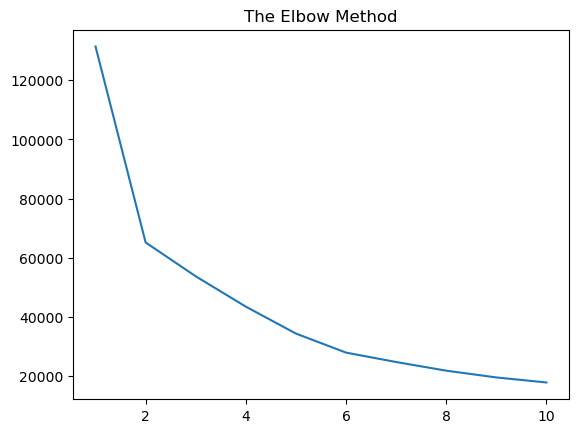

In [17]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')

In [18]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [19]:
kmeans.cluster_centers_

array([[0.64639228, 0.42049054, 0.50005953, 0.22119419, 0.92395482,
        0.81540022],
       [0.19706718, 0.38688485, 0.50005921, 0.22118925, 0.92761874,
        0.26923136]])

In [20]:
kmeans.inertia_

65193.80938209627

In [21]:
labels=kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels=sum(y==labels)
print(f"result:{correct_labels} out of {y.size} samples were correctly labeled.")

result:751 out of 536641 samples were correctly labeled.


In [22]:
print('Accuracy Score:',format(correct_labels/float(y.size)))

Accuracy Score: 0.0013994458120046736


In [23]:
#k=3
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(X)

labels=kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels=sum(y==labels)
print(f"Result: {correct_labels} out of {y.size} samples were correctly labeled.")

Result: 516 out of 536641 samples were correctly labeled.


In [24]:
print("Acuuracy Score:",format(correct_labels/float(y.size)))

Acuuracy Score: 0.0009615366697661938


In [25]:
# k=5
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(X)

labels=kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels=sum(y==labels)

print(f"Result:{correct_labels} out of {y.size} samples were correctly labeled.")

Result:1009 out of 536641 samples were correctly labeled.


In [26]:
print("Accuracy Score:",format(correct_labels/float(y.size)))

Accuracy Score: 0.0018802141468877705
